In [2]:
import wget
url = 'https://raw.githubusercontent.com/adel1726/laba1/refs/heads/main/machine.data'
filename = wget.download(url)
print(filename)

100% [................................................................................] 9876 / 9876machine (1).data


In [4]:
import pandas as pd
import numpy as np
data_source = 'machine.data'
d = pd.read_table(data_source, delimiter=',',
                  header=None,
                   names=['buying','maint','doors','persons','lug_boot','safety','class'])
d.head()

buying  maint  doors  persons  lug_boot  safety  class
adviser 32/60   125     256   6000    256       16       128     198    199
amdahl  470v/7  29     8000  32000     32        8        32     269    253
        470v/7a 29     8000  32000     32        8        32     220    253
        470v/7b 29     8000  32000     32        8        32     172    253
        470v/7c 29     8000  16000     32        8        16     132    132

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 209 entries, ('adviser', '32/60', np.int64(125)) to ('wang', 'vs-90', np.int64(480))
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    209 non-null    int64
 1   maint     209 non-null    int64
 2   doors     209 non-null    int64
 3   persons   209 non-null    int64
 4   lug_boot  209 non-null    int64
 5   safety    209 non-null    int64
 6   class     209 non-null    int64
dtypes: int64(7)
memory usage: 25.8+ KB


C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (4) than needed (15) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (4) than needed (15) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (4) than needed (15) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (4) than needed (15) and will cycle, which may produce an uninterpretable plot.
  func(x=x,

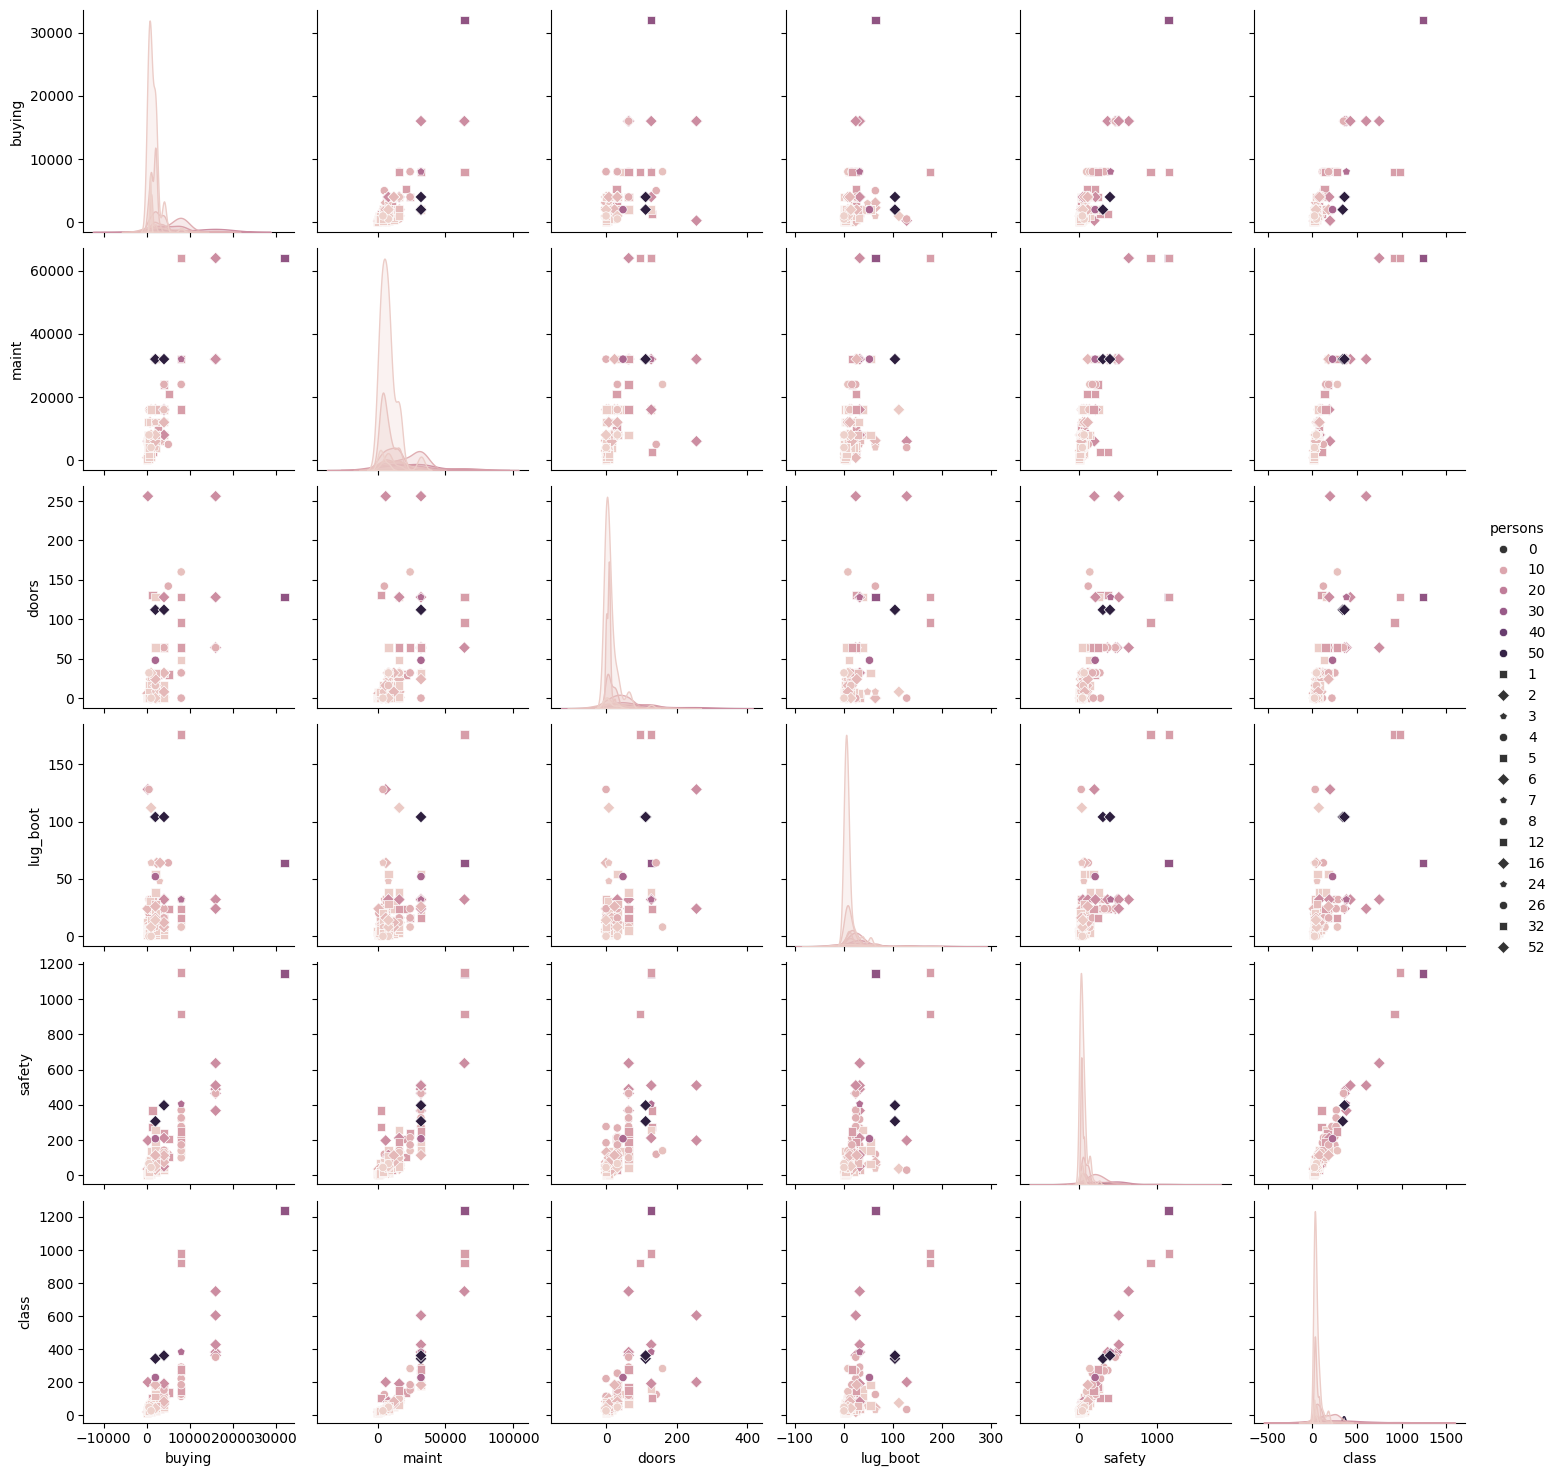

In [9]:
import seaborn as sb
%matplotlib inline
sb.pairplot(d, hue='persons', markers=["o", "s","D", "p"])

In [19]:
from sklearn.neighbors import KNeighborsClassifier
X_train = d[['buying','maint','doors','persons','lug_boot','safety']]
y_train = d['maint']
K = 6
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train.values, y_train)

X_test = np.array([[143,1500,6300,5,30,35,]])
target = knn.predict(X_test)
print(target)

[2000]


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_holdout, y_train, y_holdout = train_test_split(
    d.iloc[ :, 0:4 ],
    d['maint'],
    test_size=0.3,
    random_state=17)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.9047619047619048


Количество образцов в каждом классе:
maint
8000     43
16000    35
4000     33
32000    23
2000     17
12000    10
1000      7
6000      6
5000      5
3000      5
64000     4
24000     4
6200      3
512       2
2620      2
20970     2
10480     2
3500      1
6300      1
64        1
4500      1
768       1
1500      1
Name: count, dtype: int64


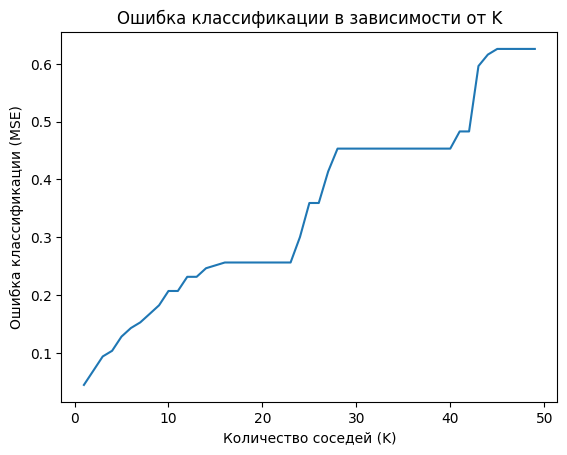

Оптимальные значения K:  [1]


In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
# Проверяем распределение классов
class_counts = d['maint'].value_counts()
print('Количество образцов в каждом классе:')
print(class_counts)

# Удаляем классы с менее чем 2 образцами
valid_classes = class_counts[class_counts >= 2].index
filtered_data = d[d['maint'].isin(valid_classes)]

# Проверяем, достаточно ли классов осталось
if filtered_data['maint'].nunique() < 2:
    raise ValueError("Недостаточно классов для выполнения кросс-валидации.")

k_list = list(range(1, 50))
cv_scores = []

# Устанавливаем количество разбиений
cv_splits = 2  

# Проверяем, достаточно ли образцов для выполнения разбиения
if len(filtered_data) < cv_splits * 2:  
    raise ValueError("Недостаточно образцов для выполнения кросс-валидации.")

stratified_kf = StratifiedKFold(n_splits=cv_splits)

for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, filtered_data.iloc[:, :13], filtered_data['maint'], cv=stratified_kf, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]

plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)')
plt.ylabel('Ошибка классификации (MSE)')
plt.title('Ошибка классификации в зависимости от K')
plt.show()

# Определение оптимальных значений K
k_min = min(MSE)
all_k_min = [k for k, mse in zip(k_list, MSE) if mse == k_min]

print('Оптимальные значения K: ', all_k_min)

In [23]:
print(sorted(list(plt.colormaps)))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cr

C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\uti

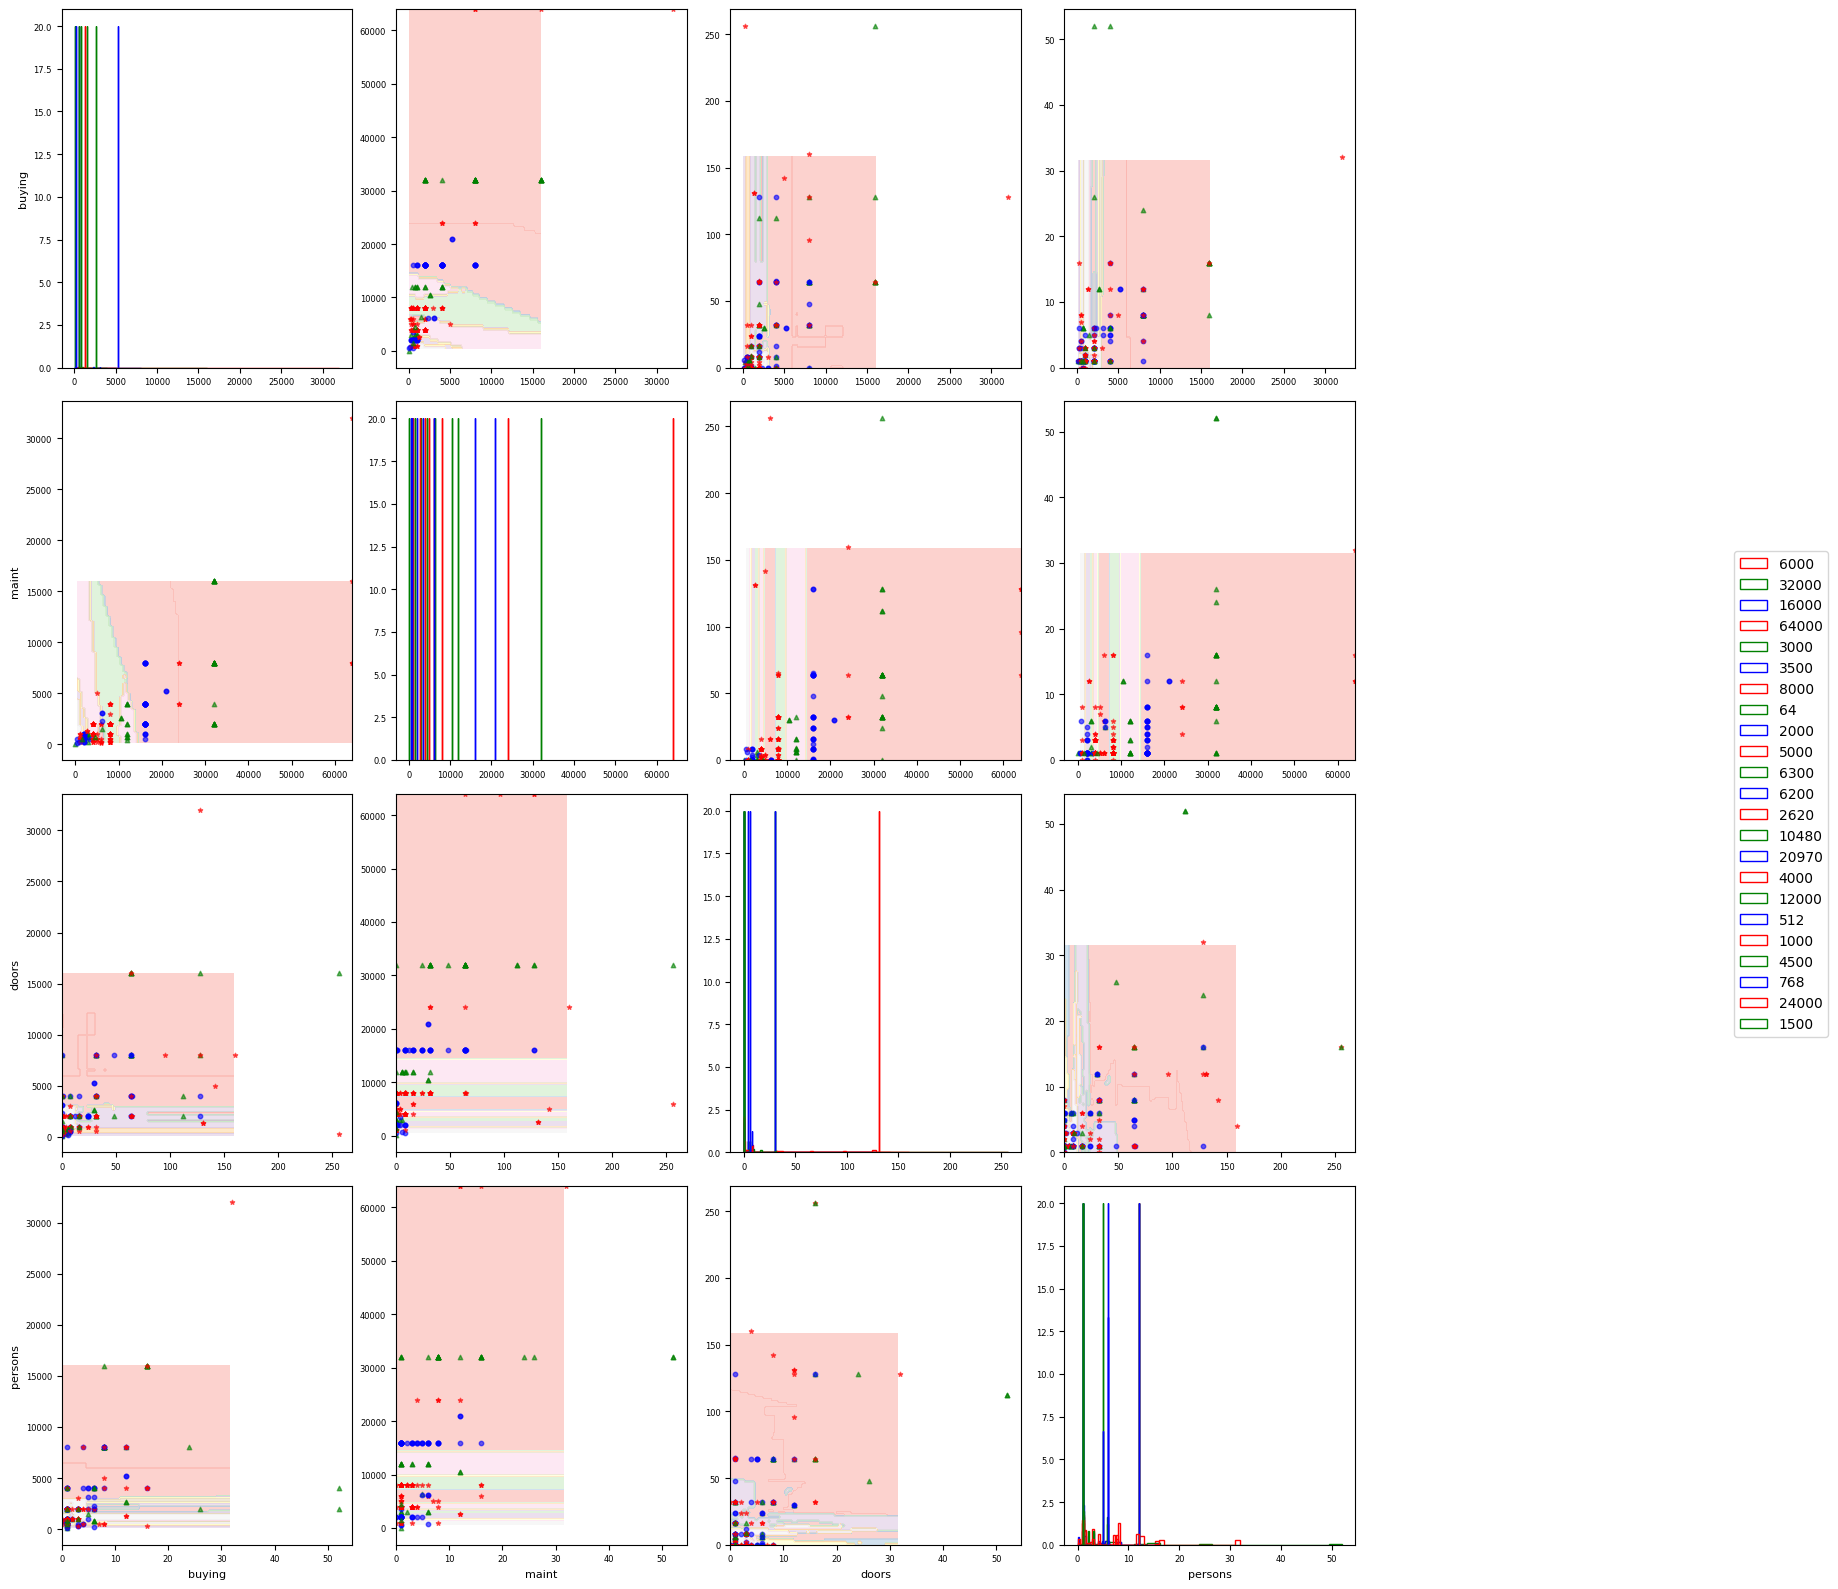

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Убедитесь, что d - ваш DataFrame с данными
dX = d.iloc[:, 0:13]
dy = d['maint']

plot_markers = ['r*', 'g^', 'bo']
answers = dy.unique()

# Создаем фигуру с 4x4 подграфиками
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Оптимизированные параметры для meshgrid
plot_step = 0.5  # Увеличили шаг для уменьшения количества точек
n_points = 100   # Фиксированное количество точек для каждой оси

for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        
        if i != j:
            # Используем percentiles для определения границ, чтобы избежать выбросов
            x_min, x_max = np.percentile(dX.iloc[:, i], [1, 99])
            y_min, y_max = np.percentile(dX.iloc[:, j], [1, 99])
            
            # Создаем сетку с фиксированным количеством точек
            xx = np.linspace(x_min, x_max, n_points)
            yy = np.linspace(y_min, y_max, n_points)
            xx, yy = np.meshgrid(xx, yy)
            
            # Обучаем модель только на текущих двух признаках
            model = KNeighborsClassifier(n_neighbors=13)
            model.fit(dX.iloc[:, [i, j]], dy)
            
            # Предсказываем классы для точек сетки
            try:
                p = model.predict(np.c_[xx.ravel(), yy.ravel()])
                p = p.reshape(xx.shape)
                
                # Конвертируем метки классов в числовые значения
                label_to_num = {label: idx for idx, label in enumerate(answers)}
                p_num = np.vectorize(label_to_num.get)(p)
                
                # Рисуем контуры
                ax.contourf(xx, yy, p_num, levels=len(answers), cmap='Pastel1', alpha=0.6)
            except MemoryError:
                print(f"Memory error for features {i} and {j}, skipping contour")
                continue
        
        # Рисуем точки данных для каждого класса
        for class_idx, answer in enumerate(answers):
            mask = (dy == answer)
            if i == j:
                # Гистограмма на диагональных графиках
                ax.hist(dX.loc[mask, dX.columns[i]], 
                        bins=20, 
                        color=plot_markers[class_idx % len(plot_markers)][0],
                        histtype='step',
                        density=True,
                        label=str(answer))
            else:
                # Точечный график на остальных
                ax.scatter(dX.loc[mask, dX.columns[i]], 
                          dX.loc[mask, dX.columns[j]],
                          marker=plot_markers[class_idx % len(plot_markers)][1],
                          color=plot_markers[class_idx % len(plot_markers)][0],
                          s=10,  # Уменьшенный размер точек
                          alpha=0.6,
                          label=str(answer))
        
        # Подписи осей
        if j == 0:
            ax.set_ylabel(dX.columns[i], fontsize=8)
        if i == 3:
            ax.set_xlabel(dX.columns[j], fontsize=8)
        
        # Уменьшаем размер шрифта меток
        ax.tick_params(axis='both', which='major', labelsize=6)

# Выносим легенду за пределы графиков
plt.tight_layout()
fig.subplots_adjust(right=0.85)
fig.legend(answers, loc='center right', bbox_to_anchor=(1.15, 0.5))
plt.show()